In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'F:\Data_Science\3D Printer\data.csv')

In [3]:
df

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7
5,0.02,10,40,honeycomb,200,60,40,pla,0,60,24,1.1
6,0.02,5,10,grid,205,65,40,pla,25,55,12,1.3
7,0.02,10,10,honeycomb,210,70,40,pla,50,21,14,1.5
8,0.02,9,70,grid,215,75,40,pla,75,24,27,1.4
9,0.02,8,40,honeycomb,220,80,40,pla,100,30,25,1.7


In [4]:
df.shape

(50, 12)

In [5]:
df.columns

Index(['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'material',
       'fan_speed', 'roughness', 'tension_strenght', 'elongation'],
      dtype='object')

In [6]:
df.dtypes

layer_height          float64
wall_thickness          int64
infill_density          int64
infill_pattern         object
nozzle_temperature      int64
bed_temperature         int64
print_speed             int64
material               object
fan_speed               int64
roughness               int64
tension_strenght        int64
elongation            float64
dtype: object

In [7]:
df.isnull().sum()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

In [8]:
df.nunique()

layer_height           5
wall_thickness        10
infill_density         9
infill_pattern         2
nozzle_temperature     9
bed_temperature        5
print_speed            3
material               2
fan_speed              5
roughness             44
tension_strenght      26
elongation            27
dtype: int64

In [9]:
missing_percentage=((df.isnull().sum()*100)/df.shape[0])
print(missing_percentage)

layer_height          0.0
wall_thickness        0.0
infill_density        0.0
infill_pattern        0.0
nozzle_temperature    0.0
bed_temperature       0.0
print_speed           0.0
material              0.0
fan_speed             0.0
roughness             0.0
tension_strenght      0.0
elongation            0.0
dtype: float64


In [10]:
df.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,0.106000,5.220000,53.40000,221.500000,70.000000,64.0000,50.000000,170.580000,20.080000,1.672000
std,0.064397,2.922747,25.36348,14.820353,7.142857,29.6923,35.714286,99.034129,8.925634,0.788188
min,0.020000,1.000000,10.00000,200.000000,60.000000,40.0000,0.000000,21.000000,4.000000,0.400000
25%,0.060000,3.000000,40.00000,210.000000,65.000000,40.0000,25.000000,92.000000,12.000000,1.100000
50%,0.100000,5.000000,50.00000,220.000000,70.000000,60.0000,50.000000,165.500000,19.000000,1.550000
75%,0.150000,7.000000,80.00000,230.000000,75.000000,60.0000,75.000000,239.250000,27.000000,2.175000
max,0.200000,10.000000,90.00000,250.000000,80.000000,120.0000,100.000000,368.000000,37.000000,3.300000


In [11]:
df.loc[:,df.isnull().any()]

""
0
1
2
3
4
5
6
7
8
9


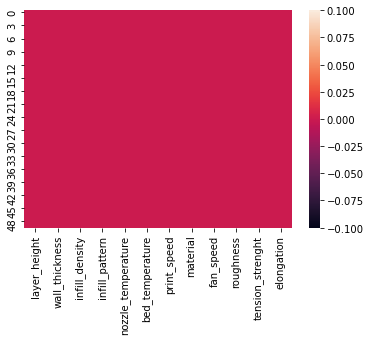

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [14]:
df.columns

Index(['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'material',
       'fan_speed', 'roughness', 'tension_strenght', 'elongation'],
      dtype='object')

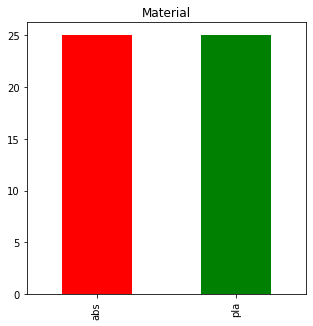

In [16]:
plt.figure(figsize=(5,5))
colors=colors=['r','g','b','m','c','y','teal','thistle','tomato','turquoise','violet','yellowgreen','coral','cornflowerblue','crimson','cyan','darkblue','darkcyan','darkslategray','darkturquoise','khaki','b','lawngreen','m','lightcoral','y','darkgreen','darkkhaki','darkmagenta','darkolivegreen','gold','goldenrod','darkred','darksalmon','darkseagreen','darkslateblue','darkviolet','deeppink','deepskyblue','darkgray','dodgerblue','firebrick','skyblue','forestgreen','fuchsia','pink','green','gray','green','greenyellow','red','hotpink','indianred']

df['material'].value_counts().sort_index().plot(kind='bar', color=colors,title=('Material'))

In [17]:
list(df.columns)

['layer_height',
 'wall_thickness',
 'infill_density',
 'infill_pattern',
 'nozzle_temperature',
 'bed_temperature',
 'print_speed',
 'material',
 'fan_speed',
 'roughness',
 'tension_strenght',
 'elongation']

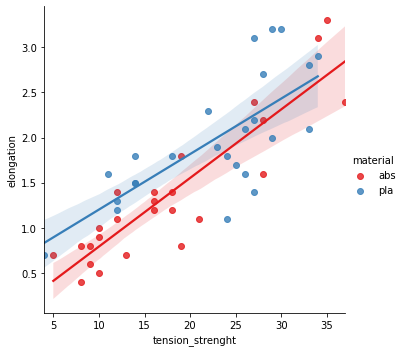

In [26]:
sns.lmplot(x='tension_strenght',y='elongation', data=df, hue='material',palette='Set1')

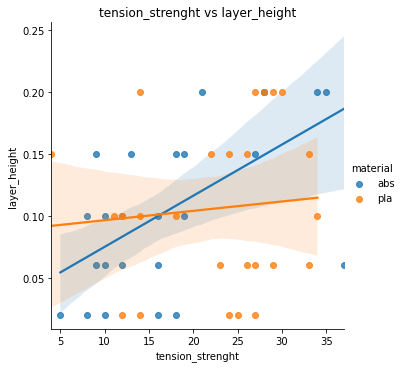

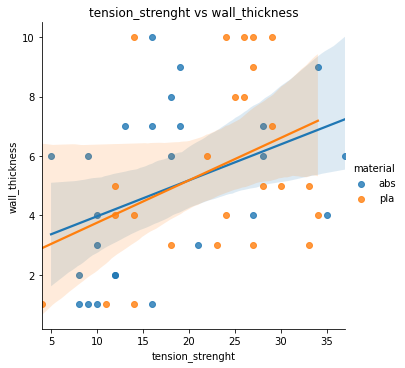

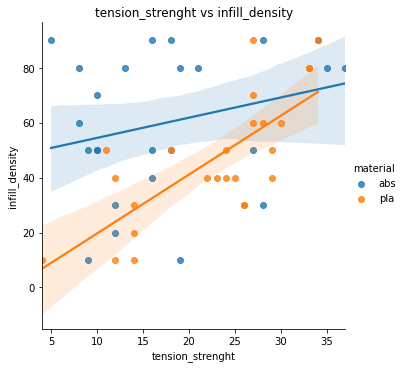

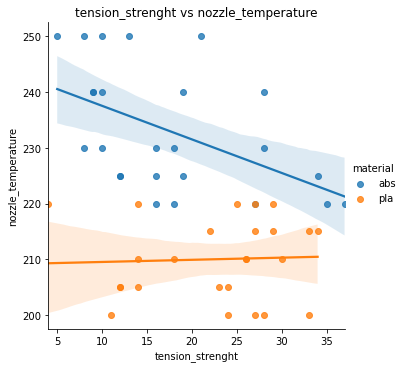

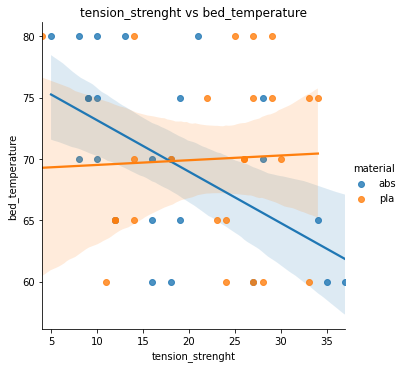

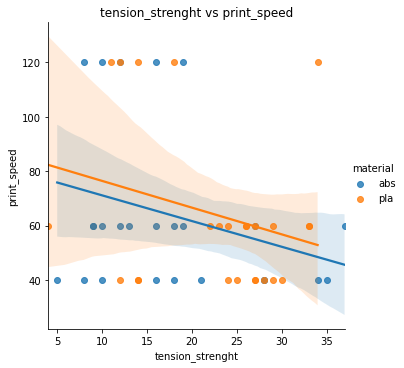

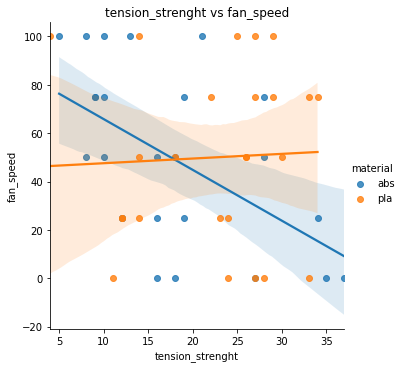

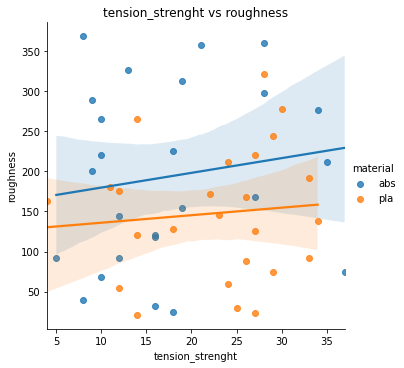

In [22]:
cols=['layer_height',
 'wall_thickness',
 'infill_density',
 'nozzle_temperature',
 'bed_temperature',
 'print_speed',
 'fan_speed',
 'roughness']
for i in cols:
    sns.lmplot(x='tension_strenght', y=i, data=df, hue='material')
    plt.title('%s vs %s' %('tension_strenght', i))

In [23]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


Text(0.5, 1.0, 'nozzle_temperature vs bed_temperature')

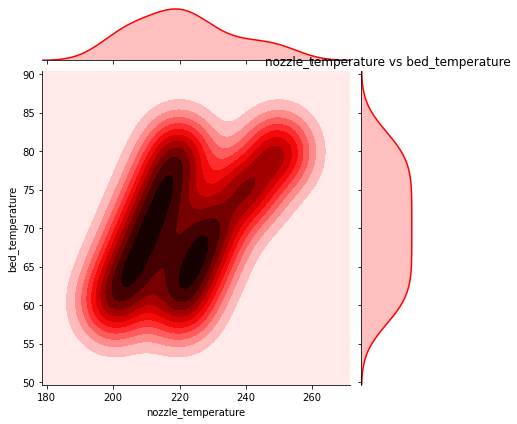

In [31]:
sns.jointplot(x='nozzle_temperature', y='bed_temperature', data=df, kind='kde',color='r')
plt.title('%s vs %s' %('nozzle_temperature', 'bed_temperature'))

Text(0.5, 1.0, 'material vs nozzle_temperature')

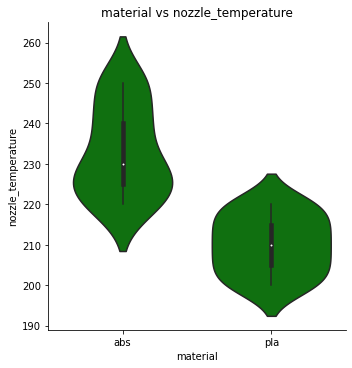

In [36]:
sns.catplot(x='material', y='nozzle_temperature', data=df, kind='violin',color='g')
plt.title('%s vs %s' %('material', 'nozzle_temperature'))

In [37]:
df.columns

Index(['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'material',
       'fan_speed', 'roughness', 'tension_strenght', 'elongation'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [39]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
encoder= LabelEncoder()
df['infill_pattern'] = encoder.fit_transform(df['infill_pattern'])

In [40]:
df.head(50)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,1,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,0,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,1,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,0,250,80,40,abs,100,92,5,0.7
5,0.02,10,40,1,200,60,40,pla,0,60,24,1.1
6,0.02,5,10,0,205,65,40,pla,25,55,12,1.3
7,0.02,10,10,1,210,70,40,pla,50,21,14,1.5
8,0.02,9,70,0,215,75,40,pla,75,24,27,1.4
9,0.02,8,40,1,220,80,40,pla,100,30,25,1.7


In [41]:
df['material']=df['material'].astype('category')

In [42]:
df.dtypes

layer_height           float64
wall_thickness           int64
infill_density           int64
infill_pattern           int32
nozzle_temperature       int64
bed_temperature          int64
print_speed              int64
material              category
fan_speed                int64
roughness                int64
tension_strenght         int64
elongation             float64
dtype: object

In [43]:
X=df.drop(['material'],axis=1)
X

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,25,18,1.2
1,0.02,7,90,1,225,65,40,25,32,16,1.4
2,0.02,1,80,0,230,70,40,50,40,8,0.8
3,0.02,4,70,1,240,75,40,75,68,10,0.5
4,0.02,6,90,0,250,80,40,100,92,5,0.7
5,0.02,10,40,1,200,60,40,0,60,24,1.1
6,0.02,5,10,0,205,65,40,25,55,12,1.3
7,0.02,10,10,1,210,70,40,50,21,14,1.5
8,0.02,9,70,0,215,75,40,75,24,27,1.4
9,0.02,8,40,1,220,80,40,100,30,25,1.7


In [44]:
y=df['material']
y

0     abs
1     abs
2     abs
3     abs
4     abs
5     pla
6     pla
7     pla
8     pla
9     pla
10    abs
11    abs
12    abs
13    abs
14    abs
15    pla
16    pla
17    pla
18    pla
19    pla
20    abs
21    abs
22    abs
23    abs
24    abs
25    pla
26    pla
27    pla
28    pla
29    pla
30    abs
31    abs
32    abs
33    abs
34    abs
35    pla
36    pla
37    pla
38    pla
39    pla
40    abs
41    abs
42    abs
43    abs
44    abs
45    pla
46    pla
47    pla
48    pla
49    pla
Name: material, dtype: category
Categories (2, object): [abs, pla]

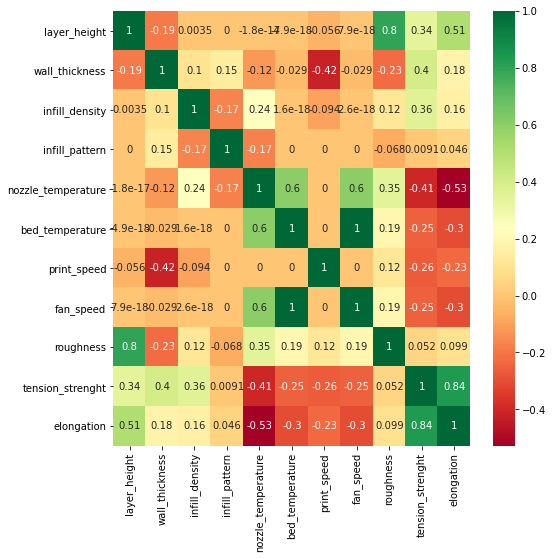

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)
plt.show()

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X,y)

ExtraTreesClassifier()

In [47]:
print(selection.feature_importances_)

[0.02092802 0.04336027 0.05458458 0.04447743 0.42082177 0.10245236
 0.01619591 0.08936471 0.0456608  0.07508581 0.08706833]


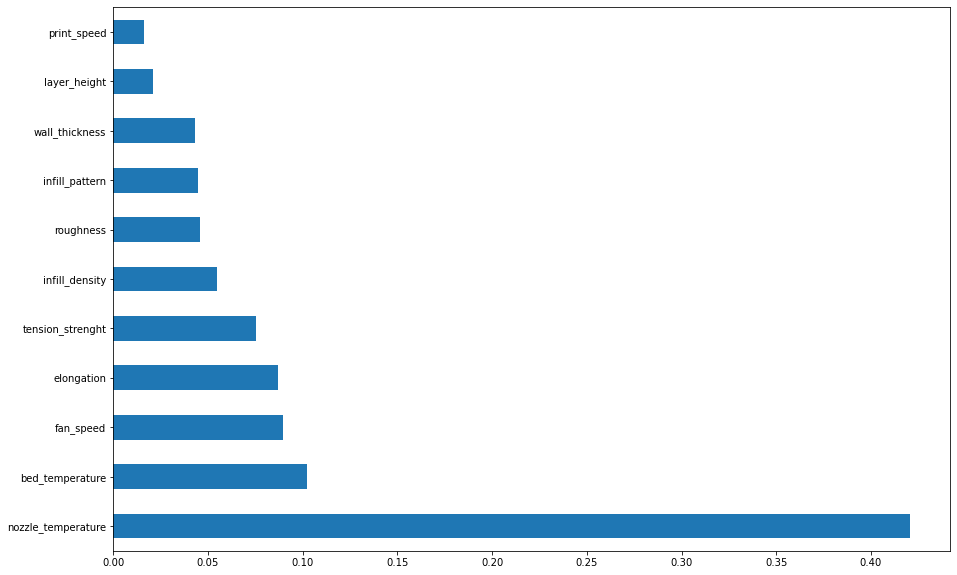

In [48]:
plt.figure(figsize=(15,10))
feature_imp=pd.Series(selection.feature_importances_, index=X.columns)
feature_imp.nlargest(20).plot(kind='barh')

In [49]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [80]:
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [81]:
svc=SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.6153846153846154

In [82]:
value=[]
algo=[]
def cross_val_score_model(model,name):
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=10)
    cv_score=cross_val_score(model,X,y,cv=cv).mean()
    print('CV_Score' + ' '+ str(model) +': '+ str(cv_score))
    value.append(cv_score)
    algo.append(name)

cross_val_score_model(SVC(),'SVC')
cross_val_score_model(KNeighborsClassifier(),'KNeighbors Classifier')
cross_val_score_model(LogisticRegression(),'Logistic Regression')
cross_val_score_model(RandomForestClassifier(),'Random Forest Classifier')
cross_val_score_model(XGBClassifier(),'XGB Classifier')

CV_Score SVC(): 0.5066666666666666
CV_Score KNeighborsClassifier(): 0.5466666666666666
CV_Score LogisticRegression(): 1.0
CV_Score RandomForestClassifier(): 0.8800000000000001
CV_Score XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None): 0.8933333333333333


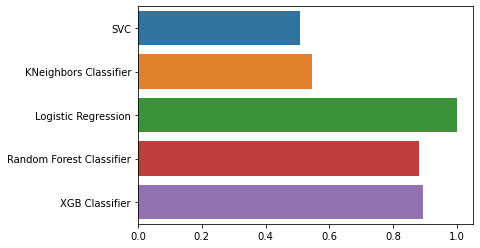

In [83]:

sns.barplot(x=value,y=algo)
plt.show()

In [84]:
Best1=pd.Series(algo)
Best2=pd.Series(value)
pd.DataFrame({'Model':Best1,'CVScore':Best2})

,Model,CVScore
0,SVC,0.506667
1,KNeighbors Classifier,0.546667
2,Logistic Regression,1.000000
3,Random Forest Classifier,0.880000
4,XGB Classifier,0.893333


# Best Model LogisticRegression Classifier

In [85]:
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_y_pred=lr.predict(X_test)
score=accuracy_score(y_test,lr_y_pred)
score


1.0

In [86]:
df.iloc[1]

layer_height          0.02
wall_thickness           7
infill_density          90
infill_pattern           1
nozzle_temperature     225
bed_temperature         65
print_speed             40
material               abs
fan_speed               25
roughness               32
tension_strenght        16
elongation             1.4
Name: 1, dtype: object

In [87]:
a=[[0.02,7,90,1,225,65,40,25,32,16,1.4]]
a=s.transform(a)
b=lr.predict(a)
b

array(['abs'], dtype=object)

In [88]:
from sklearn.metrics import confusion_matrix
c_m=confusion_matrix(y_test,lr_y_pred)
c_m

array([[8, 0],
       [0, 5]], dtype=int64)

In [89]:
columns=['abs','pla']

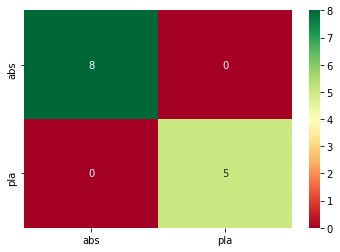

In [90]:
sns.heatmap(c_m, annot=True,cmap='RdYlGn', xticklabels = columns , yticklabels = columns)
plt.show()

In [91]:
y_test.value_counts()

abs    8
pla    5
Name: material, dtype: int64